<a href="https://colab.research.google.com/github/lpajarof/UOC_DeepLearning/blob/main/M2_875_2023_PEC3_enunciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.875 · Deep Learning · PEC2</p>
<p style="margin: 0; text-align:right;">2023-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC 3: Transformers con Keras


<u>Consideraciones generales</u>:

- Esta PEC debe realizarse de forma **estrictamente individual**. Cualquier indicio de copia será penalizado con un suspenso (D) para todas las partes implicadas y la posible evaluación negativa de la asignatura de forma íntegra.
- Es necesario que el estudiante indique **todas las fuentes** que ha utilizado para la realización de la PEC. De no ser así, se considerará que el estudiante ha cometido plagio, siendo penalizado con un suspenso (D) y la posible evaluación negativa de la asignatura de forma íntegra.

<u>Formato de la entrega</u>:

- Algunos ejercicios pueden suponer varios minutos de ejecución, por lo que la entrega debe hacerse en **formato notebook** y en **formato html**, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a HTML desde el menú File $\to$ Download as $\to$ HTML.
- Existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de la actividad. Para cambiar el tipo de celda a este tipo, en el menú: Cell $\to$ Cell Type $\to$ Markdown.

## Instalación de librerias necesarias
Puedes ejecutar las siguientes celdas para instalar las versiones de librerias necesarias

In [ ]:
#!pip3 install tensorflow==2.12.1
!pip3 install tensorflow
# Instala el paquete de modelos oficiales de TensorFlow
!pip install tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 87.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 34.3 MB/s eta 0:00:

## Carga de librerias
A continuación, os dejamos inicializadas la serie de librerías que necesitarás instalar para utilizar en esta PEC3.

In [ ]:
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:

import os
import shutil
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import tensorflow as tf
import tensorflow_models as tfm
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Embedding, Input, Dense, Dropout, Reshape,concatenate
from keras.layers import LSTM, Flatten, Dropout, MultiHeadAttention, Bidirectional, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback

In [ ]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    print('Using GPU')
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)
else:
    print('Using CPU')

Using CPU


# 0. Contexto

En esta PEC vamos a utilizar modelos de transformers, capas de atención, capas bidireccionales y el resto de algoritmos estudiados hasta el momento para construir y entrenar un clasificador gramatical de parafrasia. La parafrasia hace referencia a cuando teniendo una frase, se utilizan expresiones o palabras distintas para expresar lo mismo. Para aclarar este punto veamos un ejemplo de parafrasía:
*  Voy a ir desde Madrid a Barcelona.
*  Me voy a desplazar hasta Barcelona desde Madrid.

Sin embargo, puede ocurrir que utilizando las mismas palabras, el significado sea completamente distinto. A continuación, tenemos un ejemplo de no parafrasia en la que se utilizan las mismas palabras pero cambia radicalmente el significado:
*  Me voy a desplazar desde Vitoria a Madrid.
*  Me voy a desplazar desde Madrid a Vitoria.

La arquitectura neuronal que diseñeñemos, entrenemos y testeemos deberá ser capaz de distinguir si dos frases tienen el mismo significado o no.

Aunque pueda parecer un juego, la complejidad y el reto científico que se plantea es muy elevado y se encontraba totalmente fuera del alcance hasta hace apenas una década. Por un lado, es necesario tener un alto grado de conocimiento del léxico del idioma y por otro lado hay que tener una comprensión profunda de como el contexto, la gramática y las relaciones a larga distancia entre las palabras que generan el significado abstracto de una frase. Las aplicaciones de una arquitectura capaz de hacer esto son muchas, como por ejemplo sistemas de corrección gramatical, de simplificación de textos, de generación de resumenes, etc.   

Para esta PEC se ha elegido la base de datos PAWS(Paraphrase Adversaries from Word Scrambling), en concreto la versión PAW-Wiki. La motivación de esta base de datos es proporcionar un conjuntos de datos de identificación de paráfrasis existentes para entrenar modelos específicos. Esta compuesta por 49401 parafrasis de entrenamiento, 8000 de dev y 8000 de test.


Los objetivos de la práctica son:

* Carga, preprocesado, exploración y visualización de los datos.
* Entrenamiento de un modelo base con los conocimientos adquiridos hasta el momento.
* Comprensión de las capas bidireccionales.
* Comprensión y aplicación de las capas de atención.
* Comprensión y aplicación de bloques transformers básicos.
* Comprensión y aplicación de bloques transformers avanzados.
* Aplicación sobre dominio (downstream models) de arquitecturas preentrenadas basados en transformers.
* Adquisición de conocimientos y capacidad crítica que permita continuar mejorando los resultados.

# 1. Carga de Datos / Análisis / Preprocesado / Visualización

## 1.1. Carga y división de datos

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Ejercicio [0.5 pts.]:</strong> En esta primera parte realiza lo siguiente:
    
*  Descarga la base de datos paws_wiki utilizando tensorflow_datasets. (https://www.tensorflow.org/datasets/catalog/paws_wiki)
*  Divídelo en train, validation y test.
*  Procesa de forma adecuada los objetos obtenidos con tensorflow_datasets y genera: train_sentence1, train_sentence2, train_labels, val_sentence1, val_sentence2, val_labels, test_sentence1, test_sentence2 y val_labels. Estas nuevas variables deben ser listas (list).
* Muestra los 3 primeros elementos de cada lista. Al mostrarlos, hazlo de forma adecuada en una tabla o con otro método pero que sea algo tipo: frase_train_sentence1, frase1_train_sentence 2, train_label
* Muestra una tabla con las dimensiones de cada objeto.
* Muestra un histograma del tamaño de las frases (en numero de palabras) de train_sentence1. Aseguraté de incluir título y el nombre de los ejes.
    
</div>

## Solución 1.1

In [ ]:
# Carga el dataset PAWS-Wiki
dataset, info = tfds.load('paws_wiki', with_info=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/49401 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/paws_wiki/labeled_final_tokenized/1.1.0.incompleteXHRTML/paws_wiki-train.t…

Generating validation examples...:   0%|          | 0/8000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/paws_wiki/labeled_final_tokenized/1.1.0.incompleteXHRTML/paws_wiki-validat…

Generating test examples...:   0%|          | 0/8000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/paws_wiki/labeled_final_tokenized/1.1.0.incompleteXHRTML/paws_wiki-test.tf…

Dataset paws_wiki downloaded and prepared to /root/tensorflow_datasets/paws_wiki/labeled_final_tokenized/1.1.0. Subsequent calls will reuse this data.


In [ ]:
dataset

{Split('train'): <_PrefetchDataset element_spec={'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'sentence1': TensorSpec(shape=(), dtype=tf.string, name=None), 'sentence2': TensorSpec(shape=(), dtype=tf.string, name=None)}>,
 Split('validation'): <_PrefetchDataset element_spec={'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'sentence1': TensorSpec(shape=(), dtype=tf.string, name=None), 'sentence2': TensorSpec(shape=(), dtype=tf.string, name=None)}>,
 Split('test'): <_PrefetchDataset element_spec={'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'sentence1': TensorSpec(shape=(), dtype=tf.string, name=None), 'sentence2': TensorSpec(shape=(), dtype=tf.string, name=None)}>}

In [ ]:
# Función para extraer frases y etiquetas de un conjunto de datos
def extract_frases_y_etiquetas(ds):
    sentences1 = []
    sentences2 = []
    labels = []
    for example in ds:
        sentences1.append(example['sentence1'].numpy().decode('utf-8'))
        sentences2.append(example['sentence2'].numpy().decode('utf-8'))
        labels.append(int(example['label'].numpy()))
    return sentences1, sentences2, labels

In [ ]:
# Extrae frases y etiquetas de cada conjunto de datos
train_sentence1, train_sentence2, train_labels = extract_frases_y_etiquetas(dataset['train'])
val_sentence1, val_sentence2, val_labels = extract_frases_y_etiquetas(dataset['validation'])
test_sentence1, test_sentence2, test_labels = extract_frases_y_etiquetas(dataset['test'])

In [ ]:
# Muestra los primeros 3 elementos de cada lista en una tabla
def muestra_primeros_elementos(n):
    data = {
        'train_sentence1': train_sentence1[:n],
        'train_sentence2': train_sentence2[:n],
        'train_labels': train_labels[:n],
        'val_sentence1': val_sentence1[:n],
        'val_sentence2': val_sentence2[:n],
        'val_labels': val_labels[:n],
        'test_sentence1': test_sentence1[:n],
        'test_sentence2': test_sentence2[:n],
        'test_labels': test_labels[:n],
    }
    df = pd.DataFrame(data)
    display(df)

muestra_primeros_elementos(3)

# Muestra una tabla con las dimensiones de cada objeto
dimensiones = {
    'Objeto': ['train_sentence1', 'train_sentence2', 'train_labels', 'val_sentence1', 'val_sentence2', 'val_labels', 'test_sentence1', 'test_sentence2', 'test_labels'],
    'Dimensiones': [len(train_sentence1), len(train_sentence2), len(train_labels), len(val_sentence1), len(val_sentence2), len(val_labels), len(test_sentence1), len(test_sentence2), len(test_labels)]
}
dim_df = pd.DataFrame(dimensiones)
display(dim_df)

,train_sentence1,train_sentence2,train_labels,val_sentence1,val_sentence2,val_labels,test_sentence1,test_sentence2,test_labels
0,"Hugo Käch died on December 31 , 2003 in Schaff...",Hugo Käch died on 31 December 2003 in Flurling...,0,The plant may have some medical properties and...,The plant can have some medical properties and...,0,"The NRA has referred to the NAGR leader , Dudl...",The NRA has referred to the NAGR - leader Al S...,0
1,In 2013 Peter married Anna Barattin while Juli...,Peter Anna Barattin married in 2013 while Juli...,1,This was recorded in two separate inscriptions...,This was recorded in two long inscriptions fro...,0,The layout of Belmont is similar to that of Tw...,The Belmont layout is similar to that of Twin ...,1
2,The recent Sierra Leone Civil War was secular ...,The recent civil war in Sierra Leone was secul...,1,"Malcolm Fraser , who had defeated Whitlam in a...","Whitlam , who had defeated Malcolm Fraser in a...",0,Road access to Island Harbour is via Mill Lane...,The access to North Fairlee Road is via Mill L...,0


,Objeto,Dimensiones
0,train_sentence1,49401
1,train_sentence2,49401
2,train_labels,49401
3,val_sentence1,8000
4,val_sentence2,8000
5,val_labels,8000
6,test_sentence1,8000
7,test_sentence2,8000
8,test_labels,8000


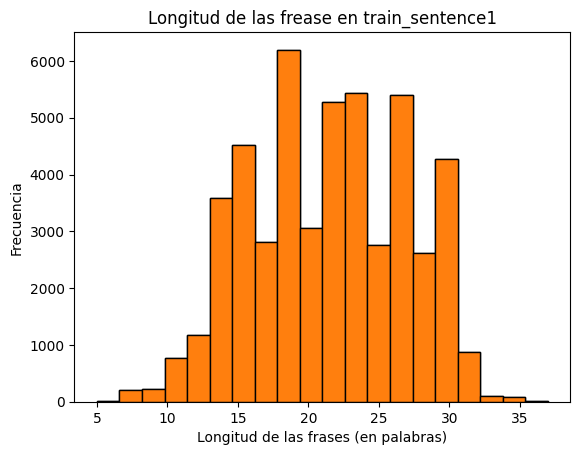

In [ ]:
# Histograma del tamaño de las frases en train_sentence1
train_sentence_lengths = [len(sentence.split()) for sentence in train_sentence1]

plt.hist(train_sentence_lengths, bins=20, edgecolor='black')
plt.title('Longitud de las frease en train_sentence1')
plt.xlabel('Longitud de las frases (en palabras)')
plt.ylabel('Frecuencia')
plt.show()

## 1.2. Procesado de las etiquetas y tokenización

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Ejercicio [0.5 pts.]:</strong> Utiliza la clase tf.keras.preprocessing.text.Tokenizer de tensorflow para procesar las frases y convertirlas a números. Límita el número de palabras distintas (vocabulario) a 5000 palabras y utiliza como token para palabras fuera de vocabulario la opción oov_token=-OOV-. Para ello:
    
*  Entrénalo sobre el conjunto train_sentence1 + train_sentence2.
*  Muestra una frase cualquiera. Tokenízala y muéstrala codificada. Decodifícala y vuelve a mostrarla.
*  ¿Cómo funciona un tokenizador y qué funciones tienen sus parámetros?
    

</div>

## Solución 1.2

In [ ]:
# Combinación del conjunto train_sentence1 y train_sentence2 para entrenar el Tokenizer
all_train_sentences = train_sentence1 + train_sentence2

# Crea y entrena el Tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token='-OOV-')
tokenizer.fit_on_texts(all_train_sentences)

# Muestra una frase cualquiera y su tokenización
sample_sentence = train_sentence1[0]
tokenized_sample = tokenizer.texts_to_sequences([sample_sentence])
decoded_sample = tokenizer.sequences_to_texts(tokenized_sample)

print("Frase original:")
print(sample_sentence)
print("\nFrase tokenizada:")
print(tokenized_sample)
print("\nFrase decodificada:")
print(decoded_sample)

Frase original:
Hugo Käch died on December 31 , 2003 in Schaffhausen near Flurlingen , Germany .

Frase tokenizada:
[[4719, 1, 70, 11, 134, 405, 330, 3, 1, 147, 1, 283]]

Frase decodificada:
['hugo -OOV- died on december 31 2003 in -OOV- near -OOV- germany']


Un tokenizador convierte texto en una secuencia de números (tokens). Estos números representan palabras o caracteres en el vocabulario del tokenizador.

La clase Tokenizer de TensorFlow tiene los siguientes parámetros:

* **num_words**: El número máximo de palabras a mantener basado en la frecuencia de las palabras.
* **oov_token**: Un token especial que se usa para palabras fuera del vocabulario (OOV, por sus siglas en inglés). Este token se asigna a cualquier palabra que no esté en el vocabulario.
* **fit_on_texts(texts)**: Ajusta el tokenizador en una lista de textos, construyendo su vocabulario.
* **texts_to_sequences(texts)**: Convierte una lista de textos en secuencias de números.
* **sequences_to_texts(sequences)**: Convierte una lista de secuencias de números de vuelta a texto.

En este ejercicio, se ha usado num_words=5000 para limitar el vocabulario a las 5000 palabras más frecuentes y oov_token='-OOV-' para manejar las palabras fuera del vocabulario. El tokenizador se entrena con todas las frases de train_sentence1 y train_sentence2, luego se tokeniza una frase de ejemplo y se decodifica para mostrar los pasos realizados.

## 1.3. Preparación de los datos para el entrenamiento

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Ejercicio [1 pts.]:</strong> Vamos a combinar lo anterior y vamos a dejar listos nuestros datos para el entrenamiento:
    
*  Calcula cual es el tamaño de la frase más larga en train_sentence1 y train_sentence2.
*  Tokeniza train_sentence1, train_sentence2, val_sentence1, val_sentence2, test_sentence1 y test_sentence2.
*  Utiliza la función preprocessing.sequence.pad_sequences con ceros para que todas las frases tokenizadas tengan la misma longitud igual al tamaño máximo de la frase  más larga.
* Transforma a numpy.arrays las variables y_train, y_val e y_test.

    
Las dimensiones finales deben ser:
*  X_train: (49401, 2, 40)
*  X_val: (8000, 2, 40)
*  X_test: (8000, 2, 40)
*  y_train: (49401,)
*  y_val: (8000,)
*  y_test: (8000,)
</div>

## Solución 1.3


In [ ]:

# Tokeniza todas las frases
train_sequences1 = tokenizer.texts_to_sequences(train_sentence1)
train_sequences2 = tokenizer.texts_to_sequences(train_sentence2)
val_sequences1 = tokenizer.texts_to_sequences(val_sentence1)
val_sequences2 = tokenizer.texts_to_sequences(val_sentence2)
test_sequences1 = tokenizer.texts_to_sequences(test_sentence1)
test_sequences2 = tokenizer.texts_to_sequences(test_sentence2)

# Calcula la longitud máxima de las frases
max_length = max(max(len(seq) for seq in train_sequences1),
                 max(len(seq) for seq in train_sequences2))

# Aplica padding a todas las secuencias
train_padded1 = pad_sequences(train_sequences1, maxlen=max_length, padding='post')
train_padded2 = pad_sequences(train_sequences2, maxlen=max_length, padding='post')
val_padded1 = pad_sequences(val_sequences1, maxlen=max_length, padding='post')
val_padded2 = pad_sequences(val_sequences2, maxlen=max_length, padding='post')
test_padded1 = pad_sequences(test_sequences1, maxlen=max_length, padding='post')
test_padded2 = pad_sequences(test_sequences2, maxlen=max_length, padding='post')

# Combina las secuencias tokenizadas y padding
X_train = np.stack((train_padded1, train_padded2), axis=1)
X_val = np.stack((val_padded1, val_padded2), axis=1)
X_test = np.stack((test_padded1, test_padded2), axis=1)

# Transforma las etiquetas a arrays de numpy
y_train = np.array(train_labels)
y_val = np.array(val_labels)
y_test = np.array(test_labels)

# Muestra las dimensiones de los conjuntos de datos
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'y_test shape: {y_test.shape}')

# Muestra los primeros 3 elementos de X_train y y_train
for i in range(3):
    print(f'\nFrase {i+1} en train_sentence1 tokenizada y con padding: {X_train[i, 0]}')
    print(f'Frase {i+1} en train_sentence2 tokenizada y con padding: {X_train[i, 1]}')
    print(f'Etiqueta {i+1} en y_train: {y_train[i]}')

X_train shape: (49401, 2, 40)
X_val shape: (8000, 2, 40)
X_test shape: (8000, 2, 40)
y_train shape: (49401,)
y_val shape: (8000,)
y_test shape: (8000,)

Frase 1 en train_sentence1 tokenizada y con padding: [4719    1   70   11  134  405  330    3    1  147    1  283    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
Frase 1 en train_sentence2 tokenizada y con padding: [4719    1   70   11  405  134  330    3    1  147    1    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
Etiqueta 1 en y_train: 0

Frase 2 en train_sentence1 tokenizada y con padding: [   3  229  293   54 1311    1   92 2618    7   54    9 1571    1  245
   21  275    5    2  244 3958 3958    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
Frase 2 en train_sentence2 tokenizada y con paddin

# 2 Entrenando un clasificador

En este apartado vamos a ir construyendo una arquitectura que contendrá todos los elementos típicos de una arquitectura transformer. La gran ventaja de las arquitecturas con elementos de atención es su capacidad de escalar cuando se entrenan con una gran capacidad de datos. En este caso, dado que la capacidad de computo es limitada, el número de datos con los que trabajaremos será pequeño por lo que es muy probable que la arquitectura presente sobreajuste muy pronto.

## 2.1 Modelo base aleatorio

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Ejercicio [1 pts.]:</strong> El primero paso para saber si el modelo clasificador que vamos a entrenar es suficientemente bueno, sería compararlo con un modelo base aleatorio. Para ello:
    
*  Muestra si el conjunto de datos de train, val y test esta balanceado. En caso de que no lo esté, la proporción de desbalanceo se mantiene entren train, val y test?
*  ¿Cuál sería la accuracy de un modelo aleatorio condicionado a que conocemos la proporción de datos que hay de cada clase en train?

### Solución 2.1

In [ ]:
# Calcula la proporción de clases en cada conjunto de datos
def calcula_clase_proporcion(labels):
    unique, counts = np.unique(labels, return_counts=True)
    clase_proporcion = dict(zip(unique, counts))
    total = sum(counts)
    for key in clase_proporcion:
        clase_proporcion[key] = (clase_proporcion[key], clase_proporcion[key] / total)
    return clase_proporcion

# Proporción de clases en los conjuntos de datos
train_distribution = calcula_clase_proporcion(y_train)
val_distribution = calcula_clase_proporcion(y_val)
test_distribution = calcula_clase_proporcion(y_test)

print("Distribución de clases en el conjunto de entrenamiento (etiqueta: (número de ejemplos, proporción)):")
print(train_distribution)
print("\nDistribución de clases en el conjunto de validación (etiqueta: (número de ejemplos, proporción)):")
print(val_distribution)
print("\nDistribución de clases en el conjunto de prueba (etiqueta: (número de ejemplos, proporción)):")
print(test_distribution)

Distribución de clases en el conjunto de entrenamiento (etiqueta: (número de ejemplos, proporción)):
{0: (27572, 0.558126353717536), 1: (21829, 0.4418736462824639)}

Distribución de clases en el conjunto de validación (etiqueta: (número de ejemplos, proporción)):
{0: (4461, 0.557625), 1: (3539, 0.442375)}

Distribución de clases en el conjunto de prueba (etiqueta: (número de ejemplos, proporción)):
{0: (4464, 0.558), 1: (3536, 0.442)}


### Análisis del Balanceo de Clases

#### 1. ¿El conjunto de datos está balanceado?

Observando las distribuciones de clases en los conjuntos de entrenamiento, validación y prueba:

- **Conjunto de entrenamiento**:
  - Clase 0: 27,572 ejemplos (55.81%)
  - Clase 1: 21,829 ejemplos (44.19%)

- **Conjunto de validación**:
  - Clase 0: 4,461 ejemplos (55.76%)
  - Clase 1: 3,539 ejemplos (44.24%)

- **Conjunto de prueba**:
  - Clase 0: 4,464 ejemplos (55.80%)
  - Clase 1: 3,536 ejemplos (44.20%)

Las proporciones son consistentes en los tres conjuntos de datos, con el 55.8% de ejemplos en la clase 0 y el 44.2% en la clase 1. Esto indica que los datos no están perfectamente balanceados, ya que hay más ejemplos de la clase 0 que de la clase 1. Sin embargo, la proporción se mantiene constante entre los conjuntos de entrenamiento, validación y prueba.

In [ ]:
# Calcula la precisión esperada de un modelo aleatorio basado en la proporción de clases en el conjunto de entrenamiento
train_total = sum(count for count, _ in train_distribution.values())
random_accuracy = sum((count / train_total) ** 2 for count, _ in train_distribution.values())

print(f"\nLa precisión esperada de un modelo aleatorio es: {random_accuracy:.4f}")


La precisión esperada de un modelo aleatorio es: 0.5068


## 2.2. Modelo base con una capa de atención de varias cabezas

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Ejercicio [2 pts.]:</strong> En este apartado vamos a construir la base de la arquitectura. Para ello:
    
*  El modelo tendrá dos inputs. Estos inputs son las frases que queremos comparar y decidir si son parafrases.
*  Cada una de ellas será la entrada de una Embedding layer con un output_dim de 20 y resto de dimensiones adecuadas.
*  A continuación se alimentarán a una capa MultiHeadAttention de 2 cabezas y cuya key_dim es la output_dim de la capa anterior
*  Después se pasa por una capa Flatten.
*  A continuación se concatenan ambos vectores.
*  Finalmente añade una última capa classificadora de una neurona y activación sigmoide
*  Muestra el resumen del modelo y el diagrama de bloques.
*  Entrena el modelo y obten los resultados sobre test. Muestra las curvas de entrenamiento
*  Comenta y discute lo que has realizado



### Solución 2.2

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input1 (InputLayer)       │ (None, 40)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input2 (InputLayer)       │ (None, 40)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 40, 20)         │        100,000 │ input1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 40, 20)         │        100,000 │ input2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 40, 20)         │          3,340 │ embedding[0][0],       │
│ (MultiHeadAttention)      │                        │                │ embedding[0][0],       │
│                           │                        │                │ embedding_1[0][0],     │
│                           │                        │                │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 800)            │              0 │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 800)            │              0 │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 1600)           │              0 │ flatten[0][0],         │
│                           │                        │                │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 1)              │          1,601 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 204,941 (800.55 KB)

 Trainable params: 204,941 (800.55 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.5557 - loss: 0.6872 - val_accuracy: 0.5639 - val_loss: 0.6825
Epoch 2/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.5817 - loss: 0.6770 - val_accuracy: 0.5570 - val_loss: 0.6840
Epoch 3/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.6043 - loss: 0.6595 - val_accuracy: 0.5525 - val_loss: 0.6931
Epoch 4/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6093 - loss: 0.6520 - val_accuracy: 0.5521 - val_loss: 0.6946
Epoch 5/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6206 - loss: 0.6422 - val_accuracy: 0.5518 - val_loss: 0.7052
Epoch 6/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6269 - loss: 0.6356 - val_accuracy: 0.5534 - val_loss: 0.6939
Epoch 7/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6304 - loss: 0.6267 - val_accuracy: 0.5514 - val_loss: 0.7115
Epoch 8/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.6387 -

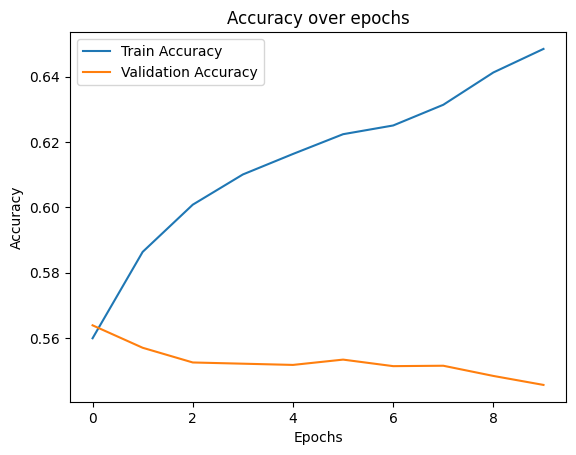

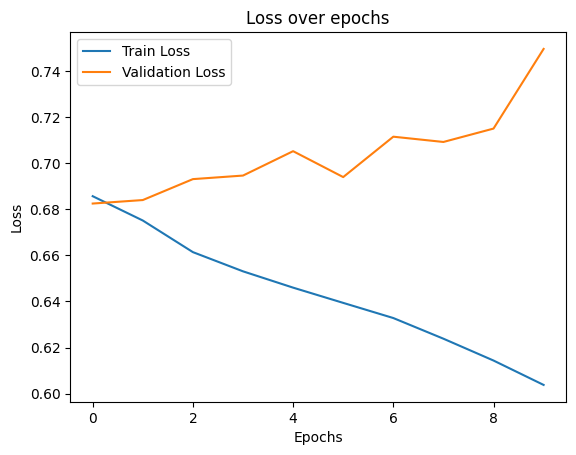

In [ ]:
from tensorflow.keras.layers import Input, Embedding, MultiHeadAttention, Flatten, Concatenate, Dense
# Parámetros del modelo
vocab_size = 5000
embedding_dim = 20
# Longitud máxima de las frases tokenizadas
max_length = X_train.shape[2]

# Definición de las entradas
input1 = Input(shape=(max_length,), name='input1')
input2 = Input(shape=(max_length,), name='input2')

# Embedding capas
embedding1 = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length)(input1)
embedding2 = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length)(input2)

# MultiHeadAttention capas
attention = MultiHeadAttention(num_heads=2, key_dim=embedding_dim)
attention_output1 = attention(embedding1, embedding1)
attention_output2 = attention(embedding2, embedding2)

# Flatten capa
flatten1 = Flatten()(attention_output1)
flatten2 = Flatten()(attention_output2)

# Concatenation
concatenated = Concatenate()([flatten1, flatten2])

# Output capa
output = Dense(1, activation='sigmoid')(concatenated)

# Definición del modelo
model = Model(inputs=[input1, input2], outputs=output)

# Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Diagrama del modelo
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model_plot.png')

# Entrenamiento del modelo
history = model.fit([X_train[:, 0], X_train[:, 1]], y_train, validation_data=([X_val[:, 0], X_val[:, 1]], y_val), epochs=10, batch_size=32)

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate([X_test[:, 0], X_test[:, 1]], y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Curvas de entrenamiento
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()

### Análisis de los Resultados

#### Gráficas de Precisión y Pérdida

Las gráficas muestran cómo evolucionaron la precisión y la pérdida tanto en el conjunto de entrenamiento como en el de validación durante las épocas de entrenamiento.

1. **Precisión (Accuracy)**:
   - La precisión del entrenamiento aumenta constantemente, llegando a un 64% aproximadamente al final de las épocas.
   - La precisión de la validación disminuye ligeramente a lo largo de las épocas, alcanzando alrededor del 53%.

2. **Pérdida (Loss)**:
   - La pérdida del entrenamiento disminuye continuamente, lo que indica que el modelo se está ajustando bien a los datos de entrenamiento.
   - La pérdida de la validación aumenta, lo que sugiere que el modelo está sobreajustando los datos de entrenamiento.

#### Métricas Finales en el Conjunto de Prueba

- **Test Loss**: 0.7203
- **Test Accuracy**: 0.5330

#### Conclusiones

1. **Sobreajuste**:
   - El modelo claramente está sobreajustando los datos de entrenamiento. Esto se observa en la divergencia entre la precisión de entrenamiento y la precisión de validación, así como en el comportamiento de las pérdidas. Mientras que la precisión del entrenamiento sigue aumentando, la precisión de la validación disminuye, y la pérdida de validación aumenta.
   - El sobreajuste es una señal de que el modelo está aprendiendo patrones específicos del conjunto de entrenamiento que no generalizan bien a los datos de validación o prueba.

2. **Desempeño del Modelo**:
   - La precisión en el conjunto de prueba es aproximadamente 53.3%, apenas mejor que el rendimiento de un clasificador aleatorio (50.27%). Esto indica que el modelo no está aprendiendo efectivamente a distinguir entre las clases de paráfrasis y no paráfrasis.


## Modifica la capa de atención

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Ejercicio [2 pts.]:</strong> Normalmente las capas de embedding que alimentan posteriormente a capas de atención es interesante que conserven información no solo sobre los vectores sino sobre las posiciones de los textos. Para ello construye una clase:
    
*  Esta clase calcula con una capa embedding como en el caso anterior los embeddings de los tokens.
*  Adicionalmente calcula los embeddings correspondientes a las posiciones del las palabras. Para ello el input_dim será el tamaño máximo de las frases calculado anteriormente.
*  Finalmente concatena ambos embeddings.
*  Sustituye la capa de Embeddings del ejercicio anterior por esta nueva que has creado y al igual que antes muestra el resumen del modelo, los diagramas, el entrenamiento y el resultado.
*  Comenta y discute lo que has realizado


### Solución

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Embedding

#Definición de la clase que calcule los embeddings de los tokens y las posiciones, y luego los concatenará.
class ClassEmbedding(Layer):
    def __init__(self, max_len, vocab_size, embed_dim):
        super(ClassEmbedding, self).__init__()
        self.token_emb = Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = Embedding(input_dim=max_len, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input1 (InputLayer)       │ (None, 40)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input2 (InputLayer)       │ (None, 40)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ class_embedding           │ (None, 40, 20)         │        100,800 │ input1[0][0],          │
│ (ClassEmbedding)          │                        │                │ input2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 40, 20)         │          3,340 │ class_embedding[0][0], │
│ (MultiHeadAttention)      │                        │                │ class_embedding[0][0], │
│                           │                        │                │ class_embedding[1][0], │
│                           │                        │                │ class_embedding[1][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 800)            │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 800)            │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 1600)           │              0 │ flatten_2[0][0],       │
│ (Concatenate)             │                        │                │ flatten_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │          1,601 │ concatenate_1[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 105,741 (413.05 KB)

 Trainable params: 105,741 (413.05 KB)

 Non-trainable params: 0 (0.00 B)

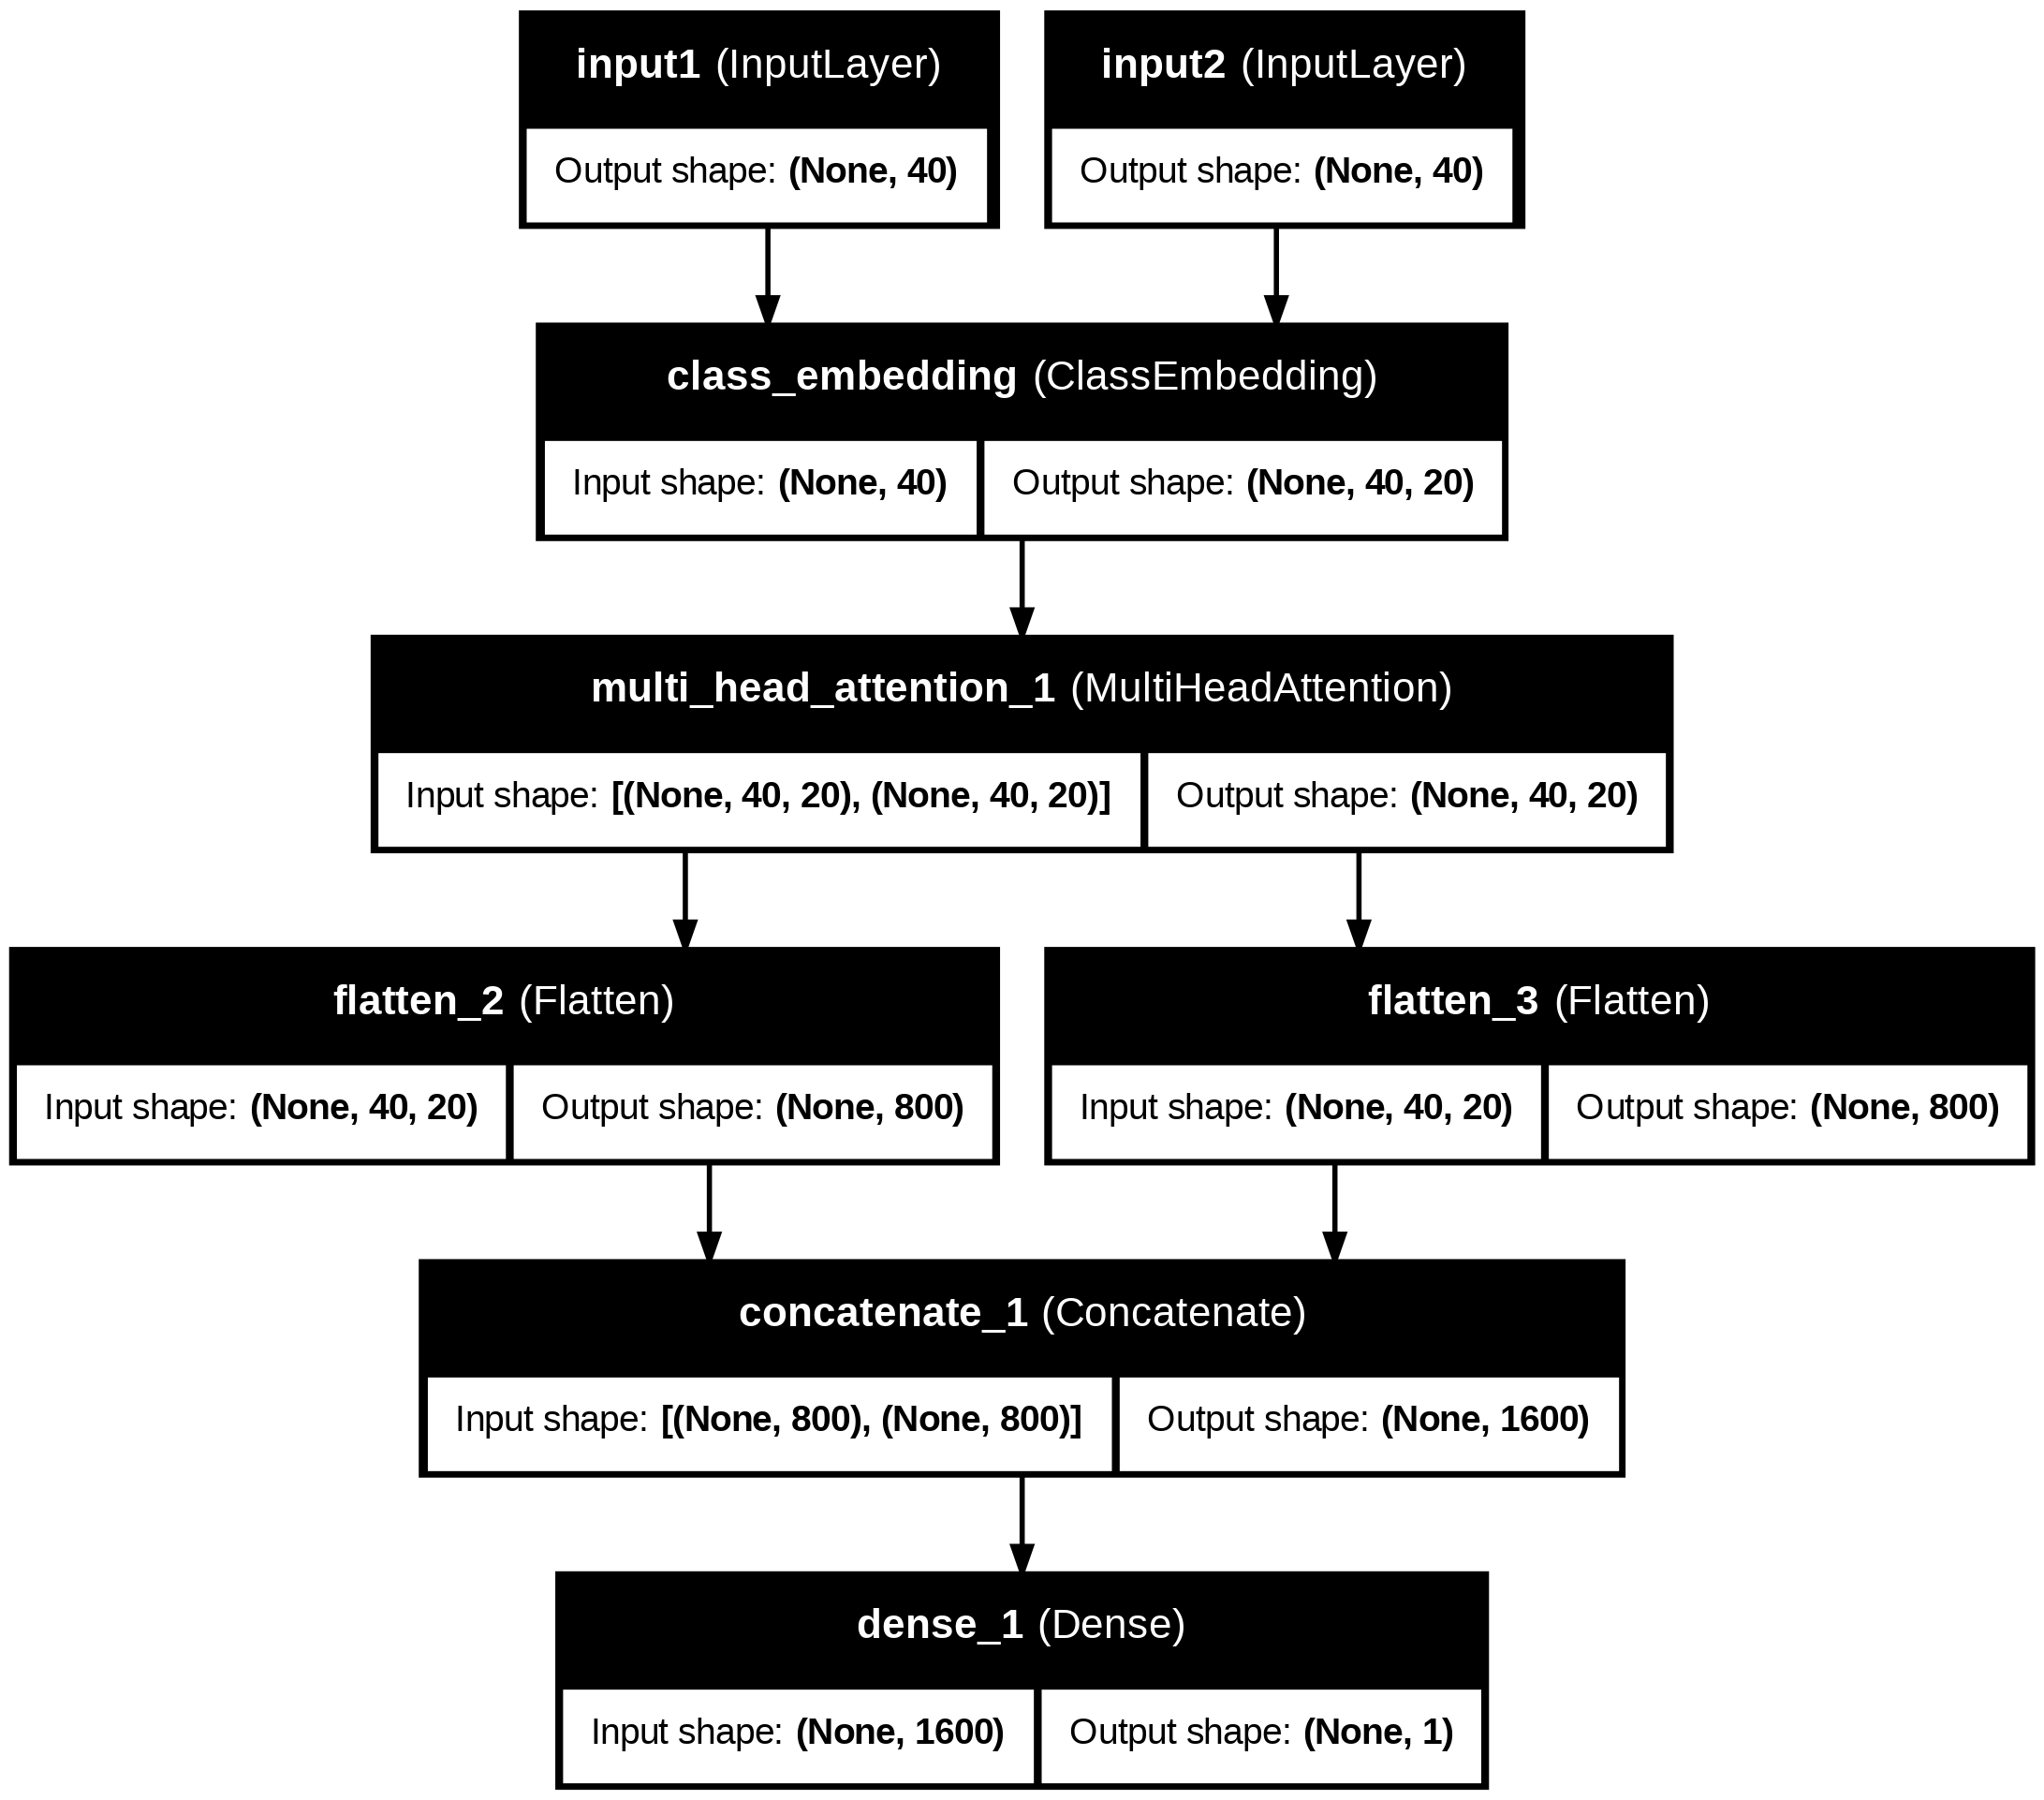

In [ ]:
# Utilización de la clase
# Parámetros del modelo
vocab_size = 5000
embedding_dim = 20
max_length = X_train.shape[2]  # Longitud máxima de las frases tokenizadas

# Definición de las entradas
input1 = Input(shape=(max_length,), name='input1')
input2 = Input(shape=(max_length,), name='input2')

# Embedding layers with positional encoding
embedding_layer = ClassEmbedding(max_length, vocab_size, embedding_dim)
embedding1 = embedding_layer(input1)
embedding2 = embedding_layer(input2)

# MultiHeadAttention layers
attention = MultiHeadAttention(num_heads=2, key_dim=embedding_dim)
attention_output1 = attention(embedding1, embedding1)
attention_output2 = attention(embedding2, embedding2)

# Flatten layers
flatten1 = Flatten()(attention_output1)
flatten2 = Flatten()(attention_output2)

# Concatenation
concatenated = Concatenate()([flatten1, flatten2])

# Output layer
output = Dense(1, activation='sigmoid')(concatenated)

# Definición del modelo
model = Model(inputs=[input1, input2], outputs=output)

# Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Diagrama del modelo
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model_plot.png')


Epoch 1/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.5571 - loss: 0.6874 - val_accuracy: 0.5602 - val_loss: 0.6837
Epoch 2/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5757 - loss: 0.6773 - val_accuracy: 0.5604 - val_loss: 0.6947
Epoch 3/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6056 - loss: 0.6574 - val_accuracy: 0.5500 - val_loss: 0.6983
Epoch 4/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.6110 - loss: 0.6486 - val_accuracy: 0.5576 - val_loss: 0.6925
Epoch 5/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.6234 - loss: 0.6390 - val_accuracy: 0.5548 - val_loss: 0.6934
Epoch 6/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step - accuracy: 0.6266 - loss: 0.6303 - val_accuracy: 0.5468 - val_loss: 0.7012
Epoch 7/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.6381 - loss: 0.6217 - val_accuracy: 0.5450 - val_loss: 0.7292
Epoch 8/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.6393 -

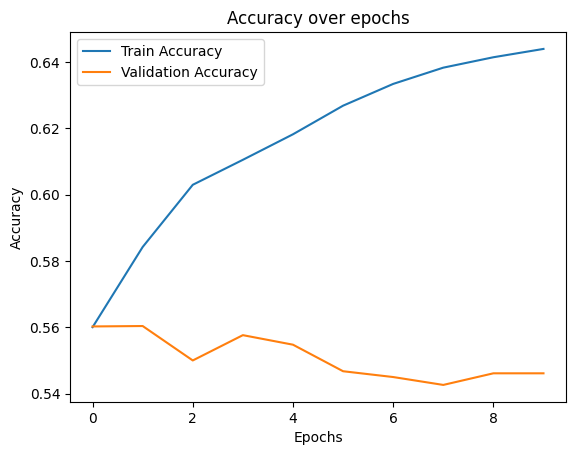

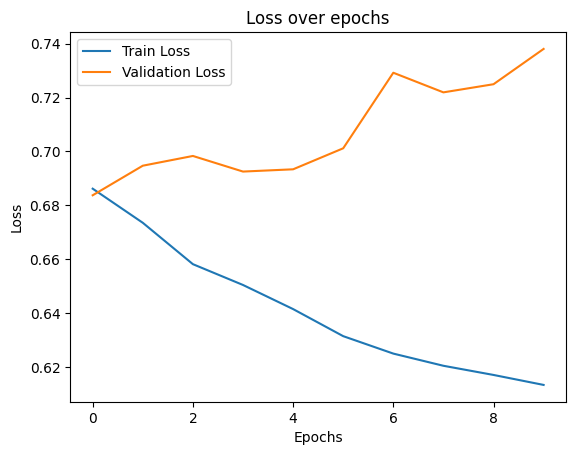

In [ ]:
# Entrenamiento del modelo
history = model.fit([X_train[:, 0], X_train[:, 1]], y_train, validation_data=([X_val[:, 0], X_val[:, 1]], y_val), epochs=10, batch_size=32)

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate([X_test[:, 0], X_test[:, 1]], y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Curvas de entrenamiento
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()


* Precisión (Accuracy):

La precisión del entrenamiento aumenta constantemente, alcanzando aproximadamente un 66% al final de las épocas.
La precisión de la validación disminuye a lo largo de las épocas, situándose en torno al 53%.

* Pérdida (Loss):

La pérdida del entrenamiento disminuye continuamente, lo que indica que el modelo se está ajustando bien a los datos de entrenamiento.
La pérdida de la validación aumenta, lo que sugiere que el modelo está sobreajustando los datos de entrenamiento.
Métricas Finales en el Conjunto de Prueba

Test Loss: 0.7395
Test Accuracy: 0.5319

### Conclusiones

* Sobreajuste Persistente:

El modelo sigue sobreajustando los datos de entrenamiento. Esto se observa en la divergencia entre la precisión de entrenamiento y la precisión de validación, así como en el comportamiento de las pérdidas. Mientras que la precisión del entrenamiento sigue aumentando, la precisión de la validación disminuye, y la pérdida de validación aumenta.
El sobreajuste es una señal de que el modelo está aprendiendo patrones específicos del conjunto de entrenamiento que no generalizan bien a los datos de validación o prueba.

* Rendimiento del Modelo:

La precisión en el conjunto de prueba es aproximadamente 53.19%, apenas mejor que el rendimiento de un clasificador aleatorio (50.27%). Esto indica que el modelo no está aprendiendo efectivamente a distinguir entre las clases de paráfrasis y no paráfrasis.

## Añade una capa bidirectional lstm

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Ejercicio [1 pts.]:</strong> Es muy interesante no alimentar directamente la capa de embeddings a la capa de atención. Lo optimo es obtener información enriquecida, por ejemplo a través de una LSTM. Por ello:
    
*  Añade una capa bidireccional LSTM justo antes de la capa MultiHeadAttention
*  Como antes, muestra el resumen, los bloques y los resultados de entrenamiento y test.
*  Comenta y discute los resultados
*  Para que sirve una capa bidireccional? Es útil cuando tenemos lenguaje natural? Y por ejemplo en una serie de bolsa?


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input1 (InputLayer)       │ (None, 40)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input2 (InputLayer)       │ (None, 40)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ class_embedding_1         │ (None, 40, 20)         │        100,800 │ input1[0][0],          │
│ (ClassEmbedding)          │                        │                │ input2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 40, 40)         │          6,560 │ class_embedding_1[0][… │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 40, 40)         │          6,560 │ class_embedding_1[1][… │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_2    │ (None, 40, 40)         │          6,560 │ bidirectional[0][0],   │
│ (MultiHeadAttention)      │                        │                │ bidirectional[0][0],   │
│                           │                        │                │ bidirectional_1[0][0], │
│                           │                        │                │ bidirectional_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_4 (Flatten)       │ (None, 1600)           │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_5 (Flatten)       │ (None, 1600)           │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 3200)           │              0 │ flatten_4[0][0],       │
│ (Concatenate)             │                        │                │ flatten_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 3200)           │              0 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │          3,201 │ dropout_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 123,681 (483.13 KB)

 Trainable params: 123,681 (483.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 134s 79ms/step - accuracy: 0.5575 - loss: 0.6875 - val_accuracy: 0.5621 - val_loss: 0.6837
Epoch 2/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 122s 79ms/step - accuracy: 0.5779 - loss: 0.6774 - val_accuracy: 0.5626 - val_loss: 0.6826
Epoch 3/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.6133 - loss: 0.6497 - val_accuracy: 0.5655 - val_loss: 0.6859
Epoch 4/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 141s 79ms/step - accuracy: 0.6174 - loss: 0.6422 - val_accuracy: 0.5620 - val_loss: 0.7009
Epoch 5/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 124s 81ms/step - accuracy: 0.6220 - loss: 0.6348 - val_accuracy: 0.5608 - val_loss: 0.7081
Epoch 6/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 146s 83ms/step - accuracy: 0.6257 - loss: 0.6310 - val_accuracy: 0.5610 - val_loss: 0.7017
Epoch 7/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 138s 80ms/step - accuracy: 0.6260 - loss: 0.6300 - val_accuracy: 0.5614 - val_loss: 0.7204
Epoch 8/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 124s 80ms/step - accuracy: 

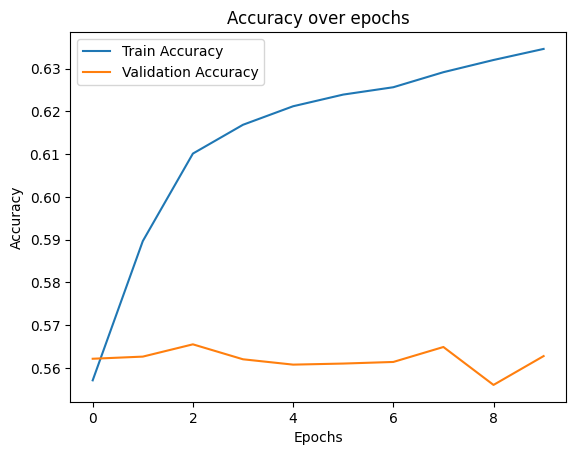

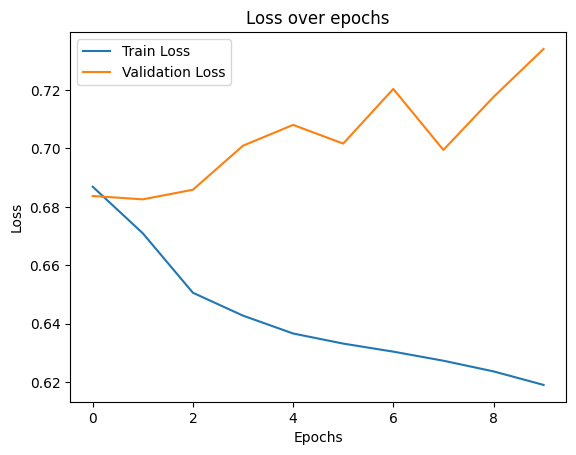

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM

# Parámetros del modelo
vocab_size = 5000
embedding_dim = 20
max_length = X_train.shape[2]  # Longitud máxima de las frases tokenizadas

# Definición de las entradas
input1 = Input(shape=(max_length,), name='input1')
input2 = Input(shape=(max_length,), name='input2')

# Embedding layers with positional encoding
embedding_layer = ClassEmbedding(max_length, vocab_size, embedding_dim)
embedding1 = embedding_layer(input1)
embedding2 = embedding_layer(input2)

# Bidirectional LSTM layers
lstm1 = Bidirectional(LSTM(embedding_dim, return_sequences=True))(embedding1)
lstm2 = Bidirectional(LSTM(embedding_dim, return_sequences=True))(embedding2)

# MultiHeadAttention layers
attention = MultiHeadAttention(num_heads=2, key_dim=embedding_dim)
attention_output1 = attention(lstm1, lstm1)
attention_output2 = attention(lstm2, lstm2)

# Flatten layers
flatten1 = Flatten()(attention_output1)
flatten2 = Flatten()(attention_output2)

# Concatenation
concatenated = Concatenate()([flatten1, flatten2])

# Dropout layer for regularization
dropout = Dropout(0.5)(concatenated)

# Output layer
output = Dense(1, activation='sigmoid')(dropout)

# Definición del modelo
model = Model(inputs=[input1, input2], outputs=output)

# Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Diagrama del modelo
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model_plot_with_lstm.png')

# Entrenamiento del modelo
history = model.fit([X_train[:, 0], X_train[:, 1]], y_train, validation_data=([X_val[:, 0], X_val[:, 1]], y_val), epochs=10, batch_size=32)

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate([X_test[:, 0], X_test[:, 1]], y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Curvas de entrenamiento
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()



La precisión del entrenamiento aumenta constantemente, alcanzando aproximadamente un 64% al final de las épocas.
La precisión de la validación se mantiene relativamente estable, situándose en torno al 56%, pero disminuye ligeramente hacia el final.

La pérdida del entrenamiento disminuye continuamente, lo que indica que el modelo se está ajustando bien a los datos de entrenamiento.
La pérdida de la validación aumenta, lo que sugiere que el modelo está sobreajustando los datos de entrenamiento.
Métricas Finales en el Conjunto de Prueba

Test Loss: 0.7526<br>
Test Accuracy: 0.5580

### Conclusiones

La precisión del conjunto de prueba ha mejorado a 55.8%, lo que es un poco mejor que el rendimiento del modelo anterior y también mejor que un clasificador aleatorio (50.27%).
Sobreajuste Persistente:

El sobreajuste sigue siendo un problema evidente. Aunque la precisión del entrenamiento sigue aumentando, la precisión de la validación se mantiene estable y la pérdida de la validación aumenta, indicando que el modelo está aprendiendo patrones específicos del conjunto de entrenamiento que no generalizan bien a los datos de validación y prueba.<br>
<br>
En procesamiento de lenguaje natural, las LSTM bidireccionales son útiles porque permiten capturar el contexto de las palabras tanto de la izquierda como de la derecha. Esto es importante en tareas como la traducción automática, el análisis de sentimientos, y la generación de texto, donde el contexto las frase pueden afectar el significado de cada palabra.

## 3. Utilizando arquitecturas preentrenadas para reforzar los datos de entrenamiento

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Ejercicio [2 pts.]:</strong> En determinadas ocasiones puede ser buena idea utilizar modelos preentrenados no solo para finetunearlos a nuestro dominio, sino simplemente para ser capaces de generar nuevos datos de entrenamiento. En nuestro caso parece que no tenemos suficientes datos ya que habrás observado problemas de sobreajuste. Por ello:
    
*  Utiliza el modelo de https://huggingface.co/Vamsi/T5_Paraphrase_Paws para generar nuevos datos de train. Puedes utilizar la estrategia que consideres oportuna para crear nuevas parafrases. Genera ejemplos tanto de parafrases como de no parafrases
*  Reentrena la arquitectura que has construido para intentar mejorar los resultados obtenidos hasta ahora.
*  Adicionalmente intenta mejorar los resultados modificando la arquitectura.
*  Comenta y discute tus resultados
*  Cual puede ser el problema o el limitante de utilizar datos sintéticos generados por una arquitectura preentrenada?


## Solución 3

Se utiliza el modelo preentrenado T5_Paraphrase_Paws para generar nuevas parafrases y no-parafrasis para combinarls con datos originales.


X_train_augmented shape: (1600, 2, 40)
y_train_augmented shape: (1600,)


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input1 (InputLayer)       │ (None, 40)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input2 (InputLayer)       │ (None, 40)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ token_and_position_embed… │ (None, 40, 20)         │        100,800 │ input1[0][0],          │
│ (TokenAndPositionEmbeddi… │                        │                │ input2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_2           │ (None, 40, 40)         │          6,560 │ token_and_position_em… │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_3           │ (None, 40, 40)         │          6,560 │ token_and_position_em… │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_3    │ (None, 40, 40)         │          6,560 │ bidirectional_2[0][0], │
│ (MultiHeadAttention)      │                        │                │ bidirectional_2[0][0], │
│                           │                        │                │ bidirectional_3[0][0], │
│                           │                        │                │ bidirectional_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_6 (Flatten)       │ (None, 1600)           │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_7 (Flatten)       │ (None, 1600)           │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 3200)           │              0 │ flatten_6[0][0],       │
│ (Concatenate)             │                        │                │ flatten_7[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 3200)           │              0 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │          3,201 │ dropout_5[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 123,681 (483.13 KB)

 Trainable params: 123,681 (483.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 159ms/step - accuracy: 0.4737 - loss: 0.6945 - val_accuracy: 0.4426 - val_loss: 0.6968
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.5725 - loss: 0.6750 - val_accuracy: 0.5180 - val_loss: 0.7748
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 176ms/step - accuracy: 0.7225 - loss: 0.5657 - val_accuracy: 0.5450 - val_loss: 0.9269
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 266ms/step - accuracy: 0.8227 - loss: 0.4097 - val_accuracy: 0.4602 - val_loss: 0.8006
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 143ms/step - accuracy: 0.8884 - loss: 0.3300 - val_accuracy: 0.4642 - val_loss: 0.9134
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.4728 - loss: 0.9174
Test Loss with Augmented Data: 0.9174959063529968
Test Accuracy with Augmented Data: 0.47337499260902405


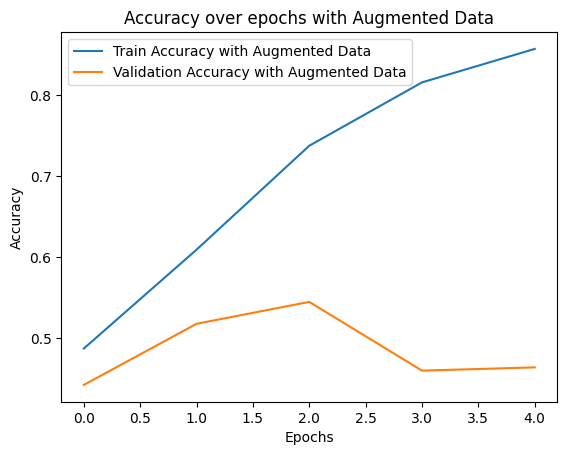

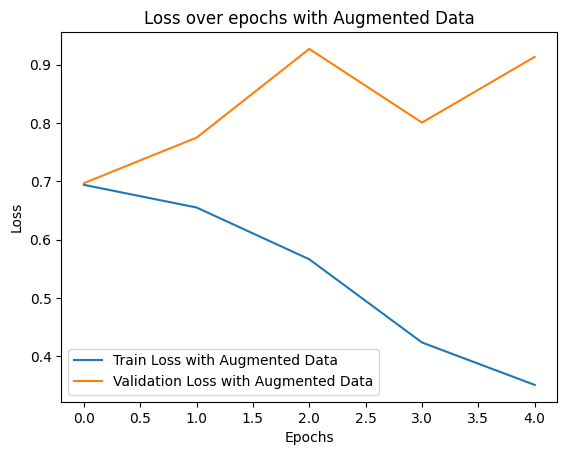

In [ ]:
!pip install transformers

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
import random
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Definir la clase TokenAndPositionEmbedding
class TokenAndPositionEmbedding(Layer):
    def __init__(self, max_len, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = Embedding(input_dim=max_len, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

# Cargar el modelo y el tokenizador de Huggingface
model_name = "Vamsi/T5_Paraphrase_Paws"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

def generate_paraphrases(sentence, num_return_sequences=3):
    input_text = f"paraphrase: {sentence} </s>"
    encoding = tokenizer.encode_plus(input_text, max_length=128, padding='max_length', return_tensors="pt")
    input_ids, attention_mask = encoding["input_ids"], encoding["attention_mask"]

    outputs = model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,
        max_length=128,
        num_return_sequences=num_return_sequences,
        num_beams=10,
        temperature=1.5
    )

    return [tokenizer.decode(output, skip_special_tokens=True, clean_up_tokenization_spaces=True) for output in outputs]

# Generar nuevos datos de entrenamiento (limitado a 200 ejemplos para rapidez)
num_examples = 200
new_train_sentence1 = []
new_train_sentence2 = []
new_train_labels = []

# Generar parafrases
for sentence in train_sentence1[:num_examples]:
    paraphrases = generate_paraphrases(sentence, num_return_sequences=2)
    for paraphrase in paraphrases:
        new_train_sentence1.append(sentence)
        new_train_sentence2.append(paraphrase)
        new_train_labels.append(1)

# Generar no-parafrasis
for sentence in train_sentence1[:num_examples]:
    non_paraphrase = random.choice(train_sentence2)
    new_train_sentence1.append(sentence)
    new_train_sentence2.append(non_paraphrase)
    new_train_labels.append(0)

# Combinar con los datos originales (también limitados)
limited_original_examples = 1000
augmented_train_sentence1 = train_sentence1[:limited_original_examples] + new_train_sentence1
augmented_train_sentence2 = train_sentence2[:limited_original_examples] + new_train_sentence2
augmented_train_labels = train_labels[:limited_original_examples] + new_train_labels

# Usar tf.keras.preprocessing.text.Tokenizer para tokenizar los textos
keras_tokenizer = Tokenizer(num_words=5000, oov_token='-OOV-')
keras_tokenizer.fit_on_texts(augmented_train_sentence1 + augmented_train_sentence2)

# Tokenizar y aplicar padding a los nuevos datos
augmented_train_sequences1 = keras_tokenizer.texts_to_sequences(augmented_train_sentence1)
augmented_train_sequences2 = keras_tokenizer.texts_to_sequences(augmented_train_sentence2)

augmented_train_padded1 = pad_sequences(augmented_train_sequences1, maxlen=max_length, padding='post')
augmented_train_padded2 = pad_sequences(augmented_train_sequences2, maxlen=max_length, padding='post')

# Crear los arrays de entrenamiento
X_train_augmented = np.stack((augmented_train_padded1, augmented_train_padded2), axis=1)
y_train_augmented = np.array(augmented_train_labels)

print(f'X_train_augmented shape: {X_train_augmented.shape}')
print(f'y_train_augmented shape: {y_train_augmented.shape}')

# Construcción del modelo con LSTM bidireccional y datos aumentados
from tensorflow.keras.layers import Input, Bidirectional, LSTM, MultiHeadAttention, Flatten, Concatenate, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Parámetros del modelo
vocab_size = 5000
embedding_dim = 20
max_length = X_train_augmented.shape[2]  # Longitud máxima de las frases tokenizadas

# Definición de las entradas
input1 = Input(shape=(max_length,), name='input1')
input2 = Input(shape=(max_length,), name='input2')

# Embedding layers with positional encoding
embedding_layer = TokenAndPositionEmbedding(max_length, vocab_size, embedding_dim)
embedding1 = embedding_layer(input1)
embedding2 = embedding_layer(input2)

# Bidirectional LSTM layers
lstm1 = Bidirectional(LSTM(embedding_dim, return_sequences=True))(embedding1)
lstm2 = Bidirectional(LSTM(embedding_dim, return_sequences=True))(embedding2)

# MultiHeadAttention layers
attention = MultiHeadAttention(num_heads=2, key_dim=embedding_dim)
attention_output1 = attention(lstm1, lstm1)
attention_output2 = attention(lstm2, lstm2)

# Flatten layers
flatten1 = Flatten()(attention_output1)
flatten2 = Flatten()(attention_output2)

# Concatenation
concatenated = Concatenate()([flatten1, flatten2])

# Dropout layer for regularization
dropout = Dropout(0.5)(concatenated)

# Output layer
output = Dense(1, activation='sigmoid')(dropout)

# Definición del modelo
model = Model(inputs=[input1, input2], outputs=output)

# Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Diagrama del modelo
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model_plot_with_lstm.png')

# Entrenamiento del modelo con datos aumentados limitados
history_augmented = model.fit([X_train_augmented[:, 0], X_train_augmented[:, 1]], y_train_augmented, validation_data=([X_val[:, 0], X_val[:, 1]], y_val), epochs=5, batch_size=32)

# Evaluación del modelo en el conjunto de prueba
test_loss_augmented, test_accuracy_augmented = model.evaluate([X_test[:, 0], X_test[:, 1]], y_test)
print(f'Test Loss with Augmented Data: {test_loss_augmented}')
print(f'Test Accuracy with Augmented Data: {test_accuracy_augmented}')

# Curvas de entrenamiento con datos aumentados limitados
plt.plot(history_augmented.history['accuracy'], label='Train Accuracy with Augmented Data')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy with Augmented Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over epochs with Augmented Data')
plt.show()

plt.plot(history_augmented.history['loss'], label='Train Loss with Augmented Data')
plt.plot(history_augmented.history['val_loss'], label='Validation Loss with Augmented Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over epochs with Augmented Data')
plt.show()


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 290ms/step - accuracy: 0.8829 - loss: 0.2782 - val_accuracy: 0.4714 - val_loss: 1.0565
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 140ms/step - accuracy: 0.9162 - loss: 0.2179 - val_accuracy: 0.5109 - val_loss: 1.4736
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - accuracy: 0.9126 - loss: 0.2001 - val_accuracy: 0.5397 - val_loss: 1.7505
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.9198 - loss: 0.1779 - val_accuracy: 0.5215 - val_loss: 1.9120
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - accuracy: 0.9452 - loss: 0.1302 - val_accuracy: 0.4942 - val_loss: 1.5234
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.4926 - loss: 1.5775
Test Loss with Augmented Data: 1.565803050994873
Test Accuracy with Augmented Data: 0.4918749928474426


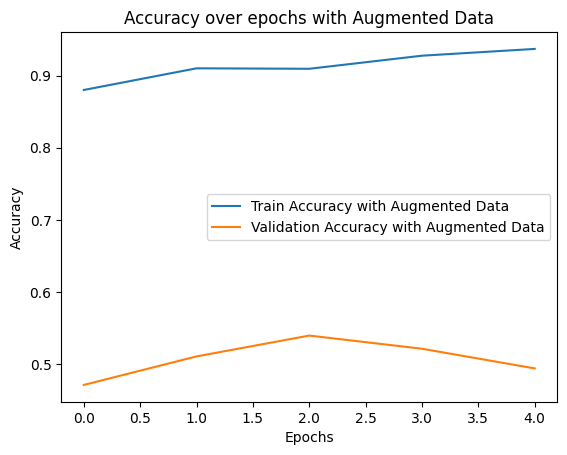

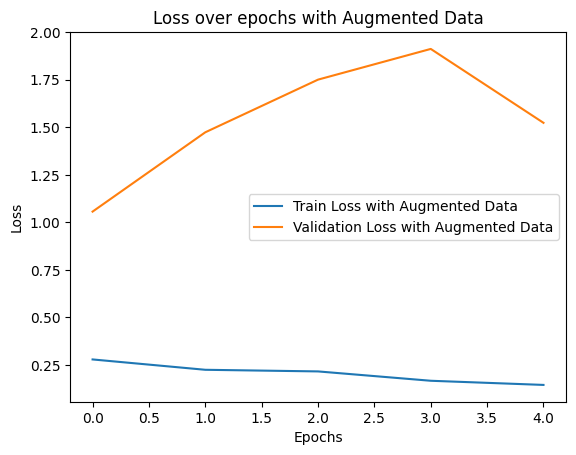

In [ ]:
# Entrenamiento del modelo con datos aumentados limitados
history_augmented = model.fit([X_train_augmented[:, 0], X_train_augmented[:, 1]], y_train_augmented, validation_data=([X_val[:, 0], X_val[:, 1]], y_val), epochs=5, batch_size=32)

# Evaluación del modelo en el conjunto de prueba
test_loss_augmented, test_accuracy_augmented = model.evaluate([X_test[:, 0], X_test[:, 1]], y_test)
print(f'Test Loss with Augmented Data: {test_loss_augmented}')
print(f'Test Accuracy with Augmented Data: {test_accuracy_augmented}')

# Curvas de entrenamiento con datos aumentados limitados
plt.plot(history_augmented.history['accuracy'], label='Train Accuracy with Augmented Data')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy with Augmented Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over epochs with Augmented Data')
plt.show()

plt.plot(history_augmented.history['loss'], label='Train Loss with Augmented Data')
plt.plot(history_augmented.history['val_loss'], label='Validation Loss with Augmented Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over epochs with Augmented Data')
plt.show()


A continuación, se presenta el resultado del modelo.


1. **Precisión**
   La precisión en el entrenamiento es muy alta, cercana al 100%.
   La precisión en la validación alcanza un máximo de aproximadamente 50% y luego disminuye.

2. **Pérdida**
   La pérdida en el entrenamiento es baja y disminuye continuamente. La pérdida en la validación aumenta inicialmente, alcanza un pico y luego disminuye, pero se mantiene en un nivel alto.

3. **Métricas de Evaluación**

- **Test Loss (Pérdida en el test)**: 1.565803050994873
- **Test Accuracy (Precisión en el test)**: 0.4918749928474426

### Análisis

La alta precisión en el conjunto de entrenamiento combinada con la baja precisión en el conjunto de validación/test indica que el modelo puede estar sobreajustado. Esto significa que el modelo ha aprendido muy bien los datos de entrenamiento, pero no generaliza bien a datos nuevos.
<br>
El uso de datos aumentados puede no haber sido suficiente para mejorar la generalización del modelo. Es posible que que se necesiten más datos originales.

Se pueden realizar otros ejercicios con más épocas y ajustar la tasa de aprendizaje y evaluar el modelo.